In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
plt.style.use("./tplot.mplstyle")

In [3]:
N=20
t2=20
t3=50
ab=10.0
a=10.0
b=1
dt=0.1
tf=29950.2  # i messed up. Instead of taking last 500 i saved every prepull point but the lst 500. oopsie
lt = int(29950.2001/0.1) 
times= np.arange(0, 10000.1, dt)
Dr0s = np.arange(-2.0,0,0.2)

In [4]:
Sols = np.zeros((len(Dr0s), lt, N+1))

for d in np.arange(len(Dr0s)):
    Sols[d] += (np.fromfile("step_strain_extend/{:d}/{:1.1f}/{:1.1f}/{:1.1f}/solution_{:1.2f}.dat".format(N, ab, t2, t3, -Dr0s[d])).reshape(lt, 3*N+1))[:, :N+1]

Sols = Sols[:,-100001:]
Sols -= np.arange(0, N+1, 1)[np.newaxis, np.newaxis, :]


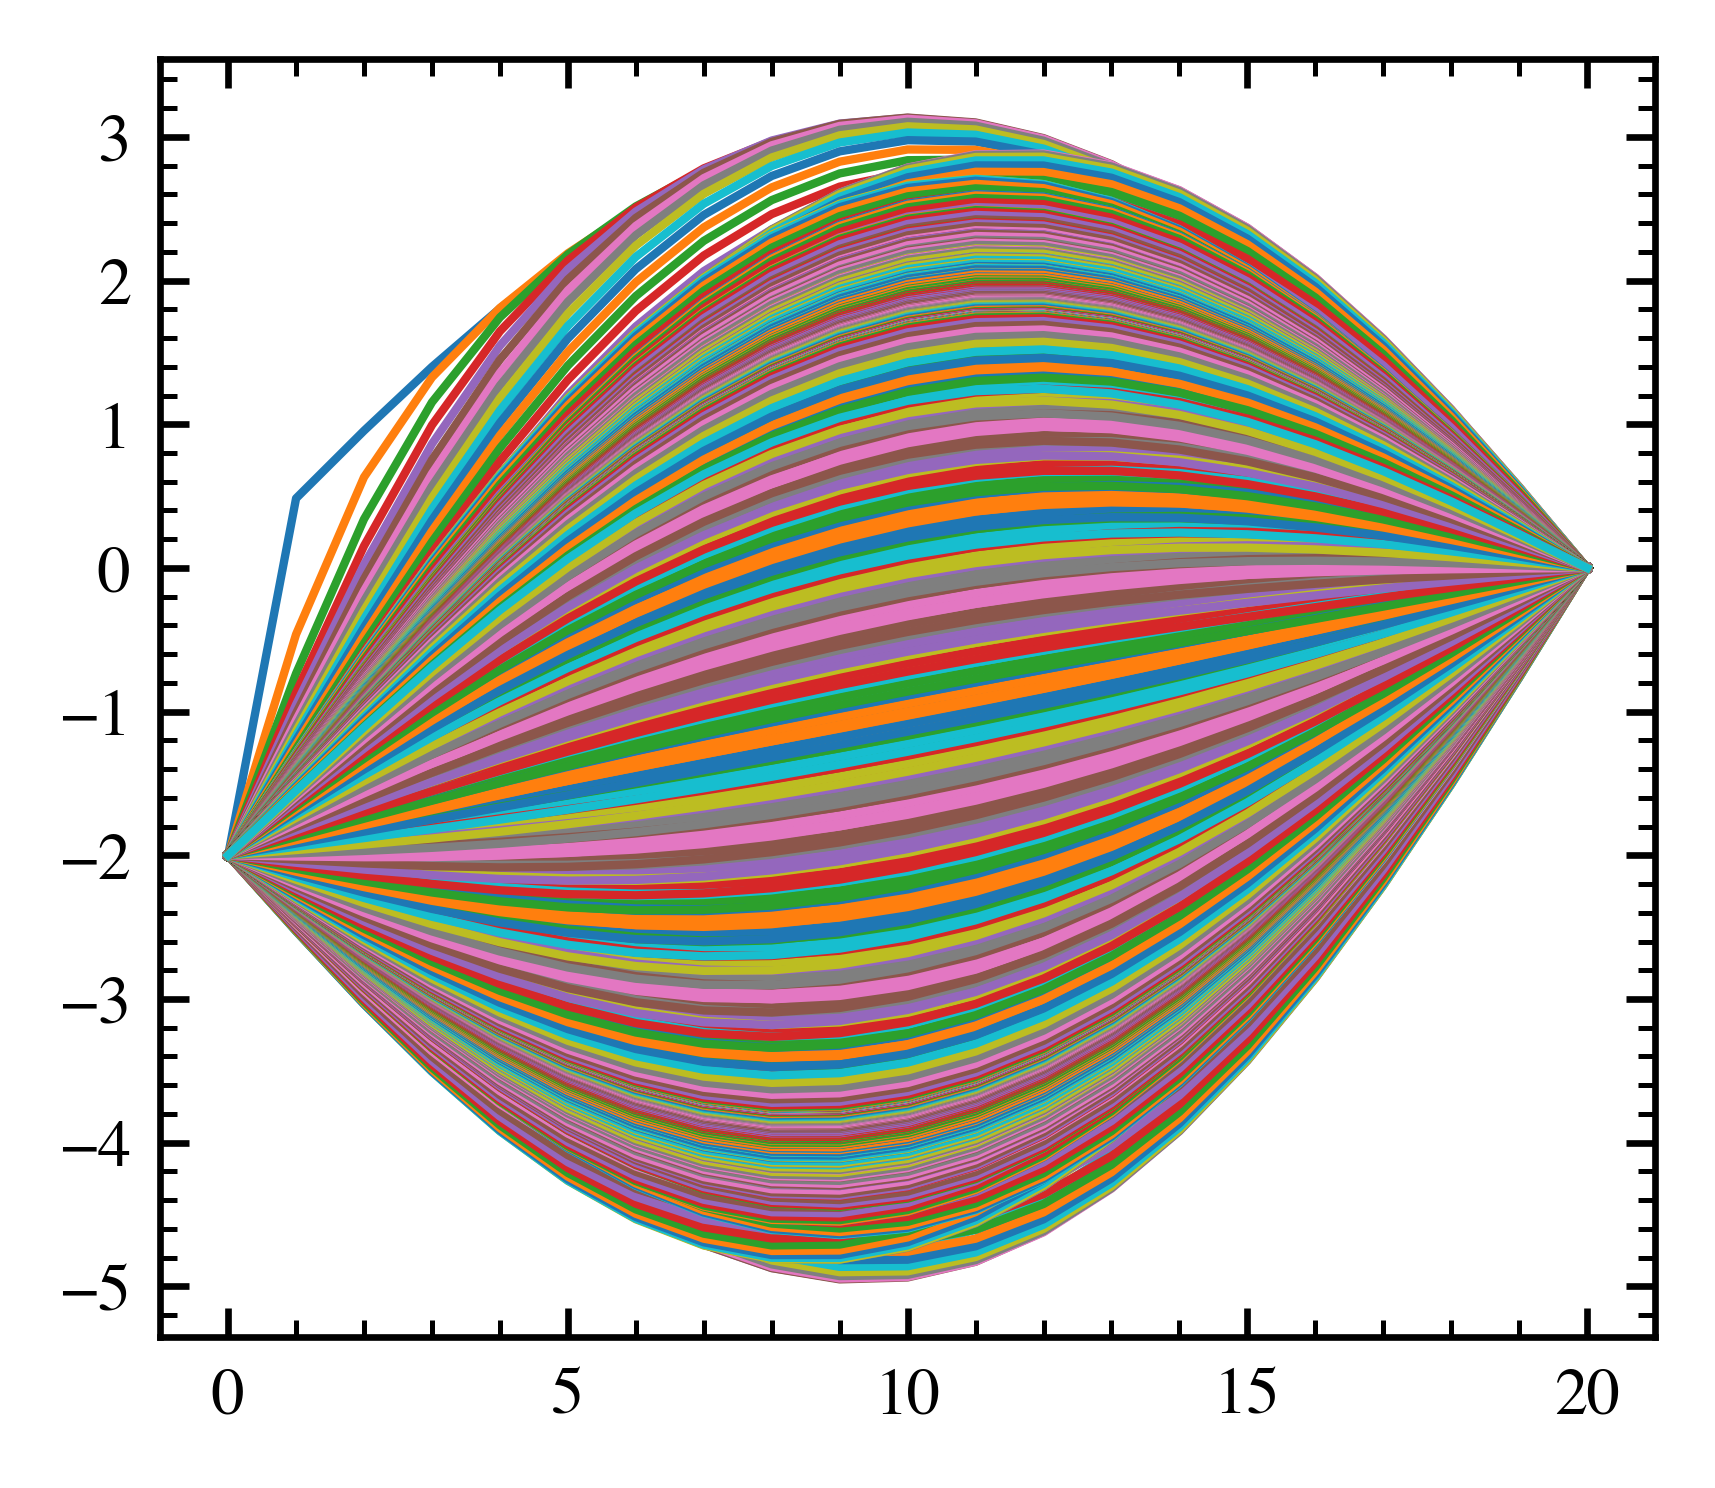

In [5]:
plt.plot(np.arange(0,N+1,1), Sols[0,0:-1:10,:].T)
plt.show()

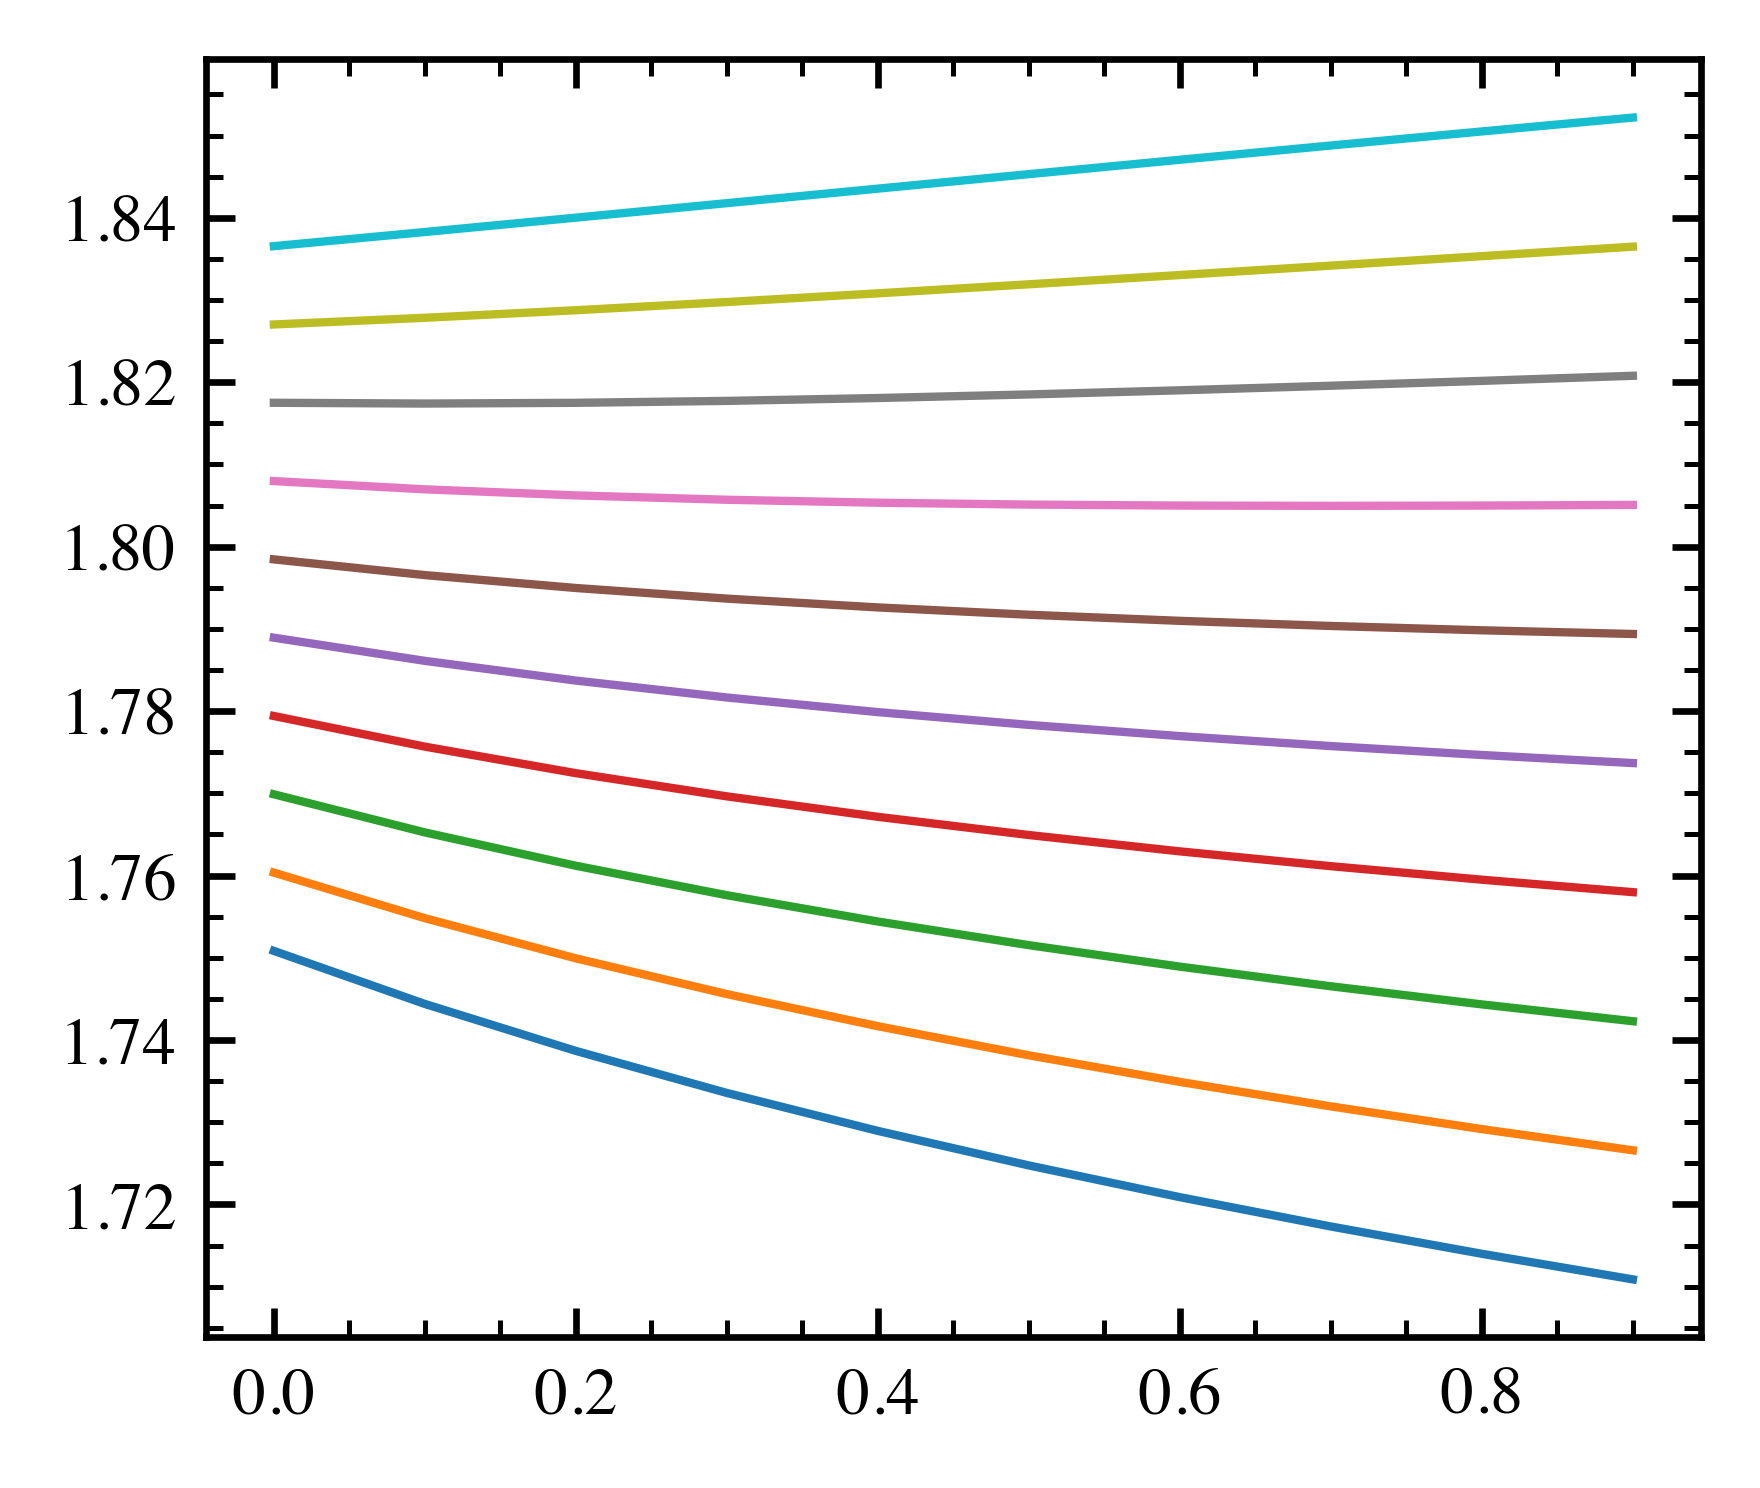

In [6]:
dispcom = np.average(Sols[:,:10], axis=2)   #disp of com
plt.plot(times[:10], dispcom.T)

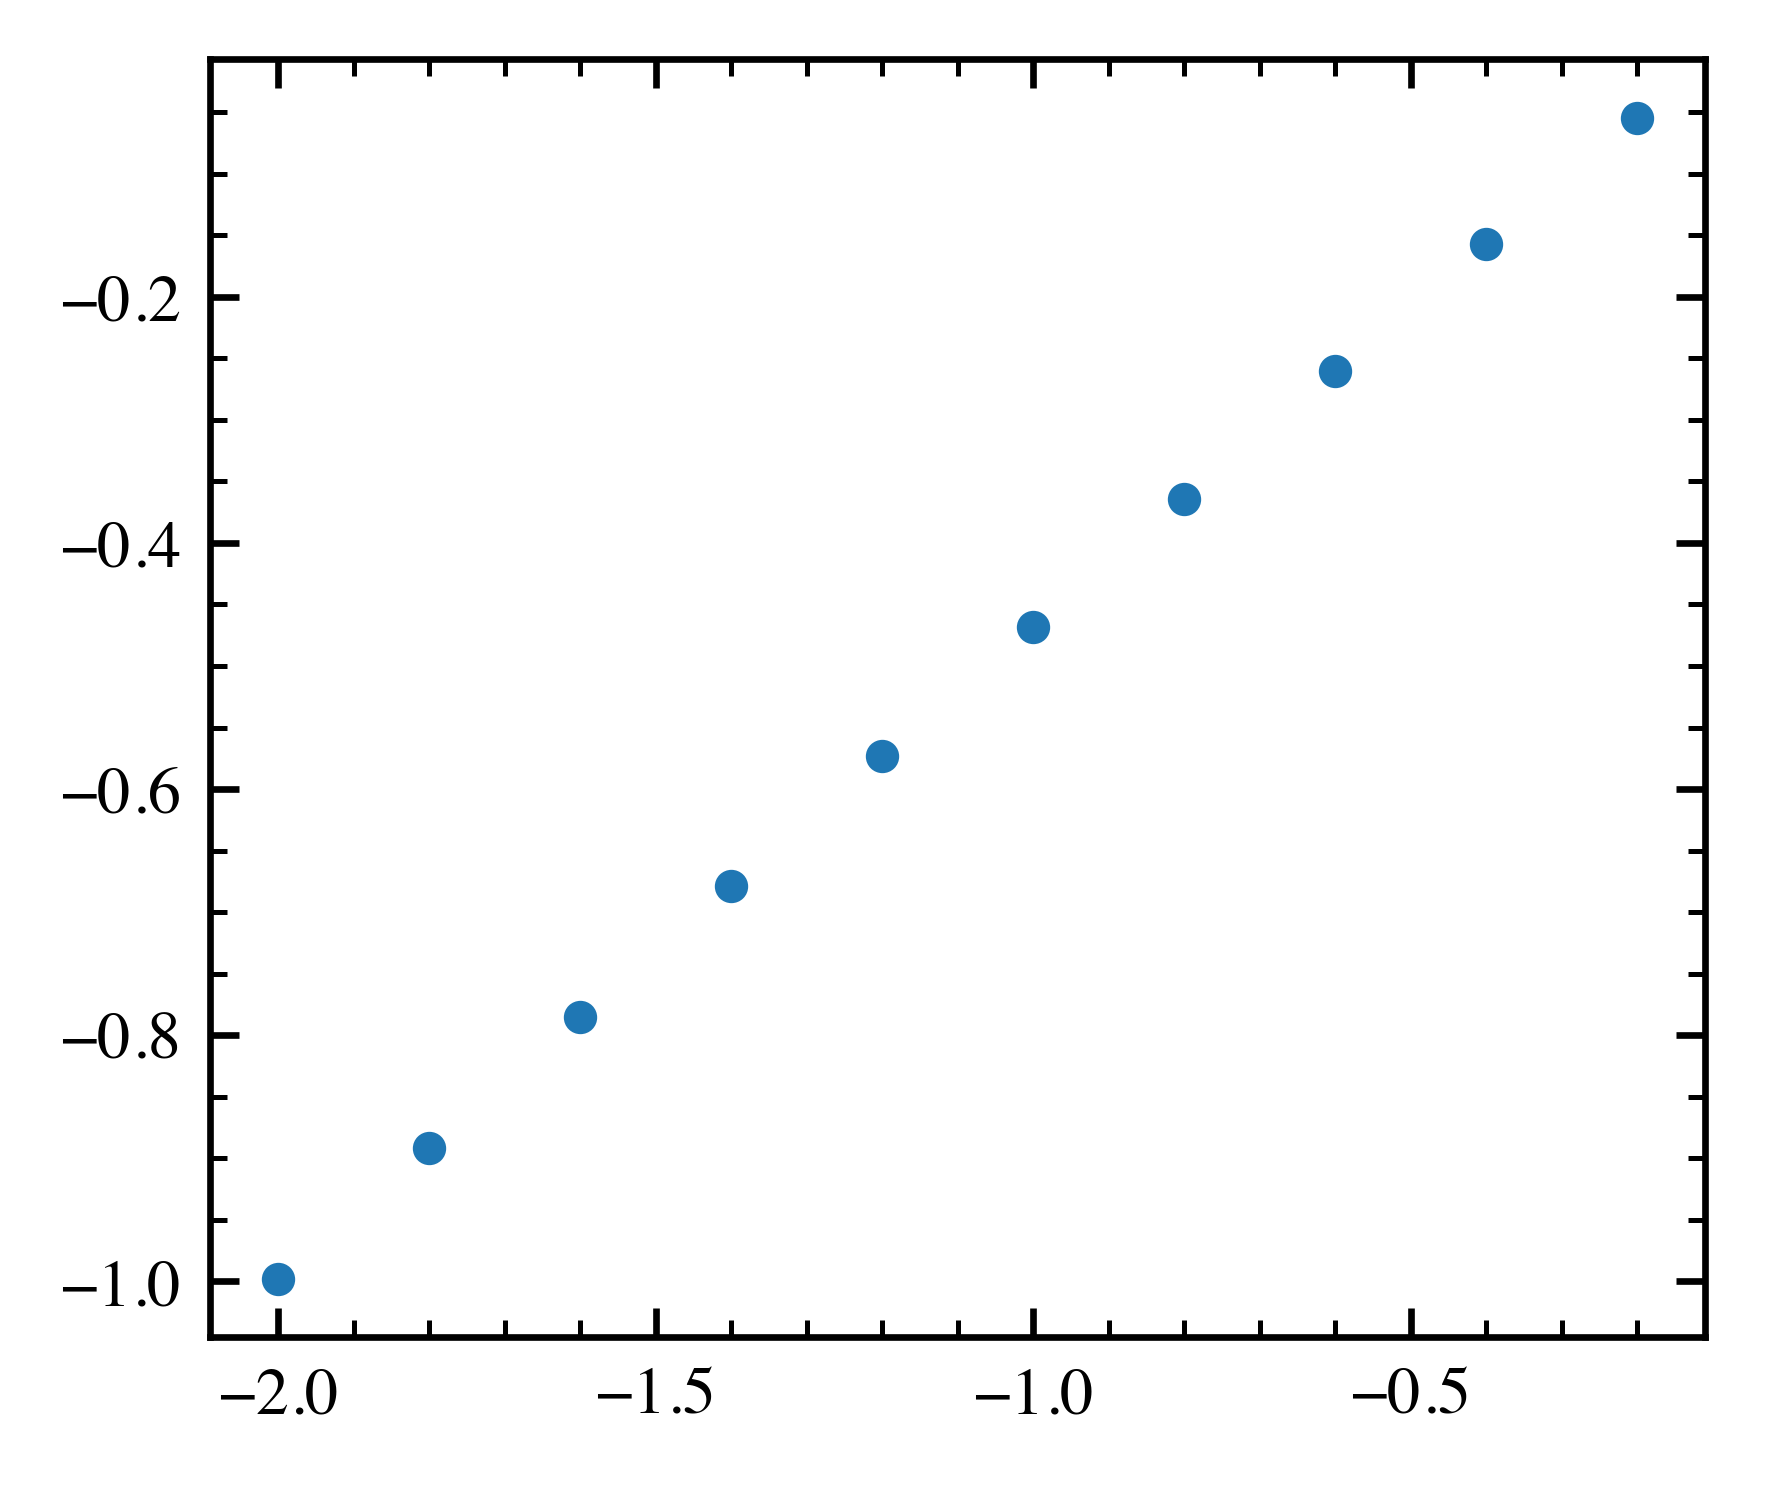

In [55]:
avgcom = np.average(dispcom[:,-10000:], axis=1)
plt.scatter(Dr0s, avgcom)

#com shifts by exactly 1/2 of the perturbation amt

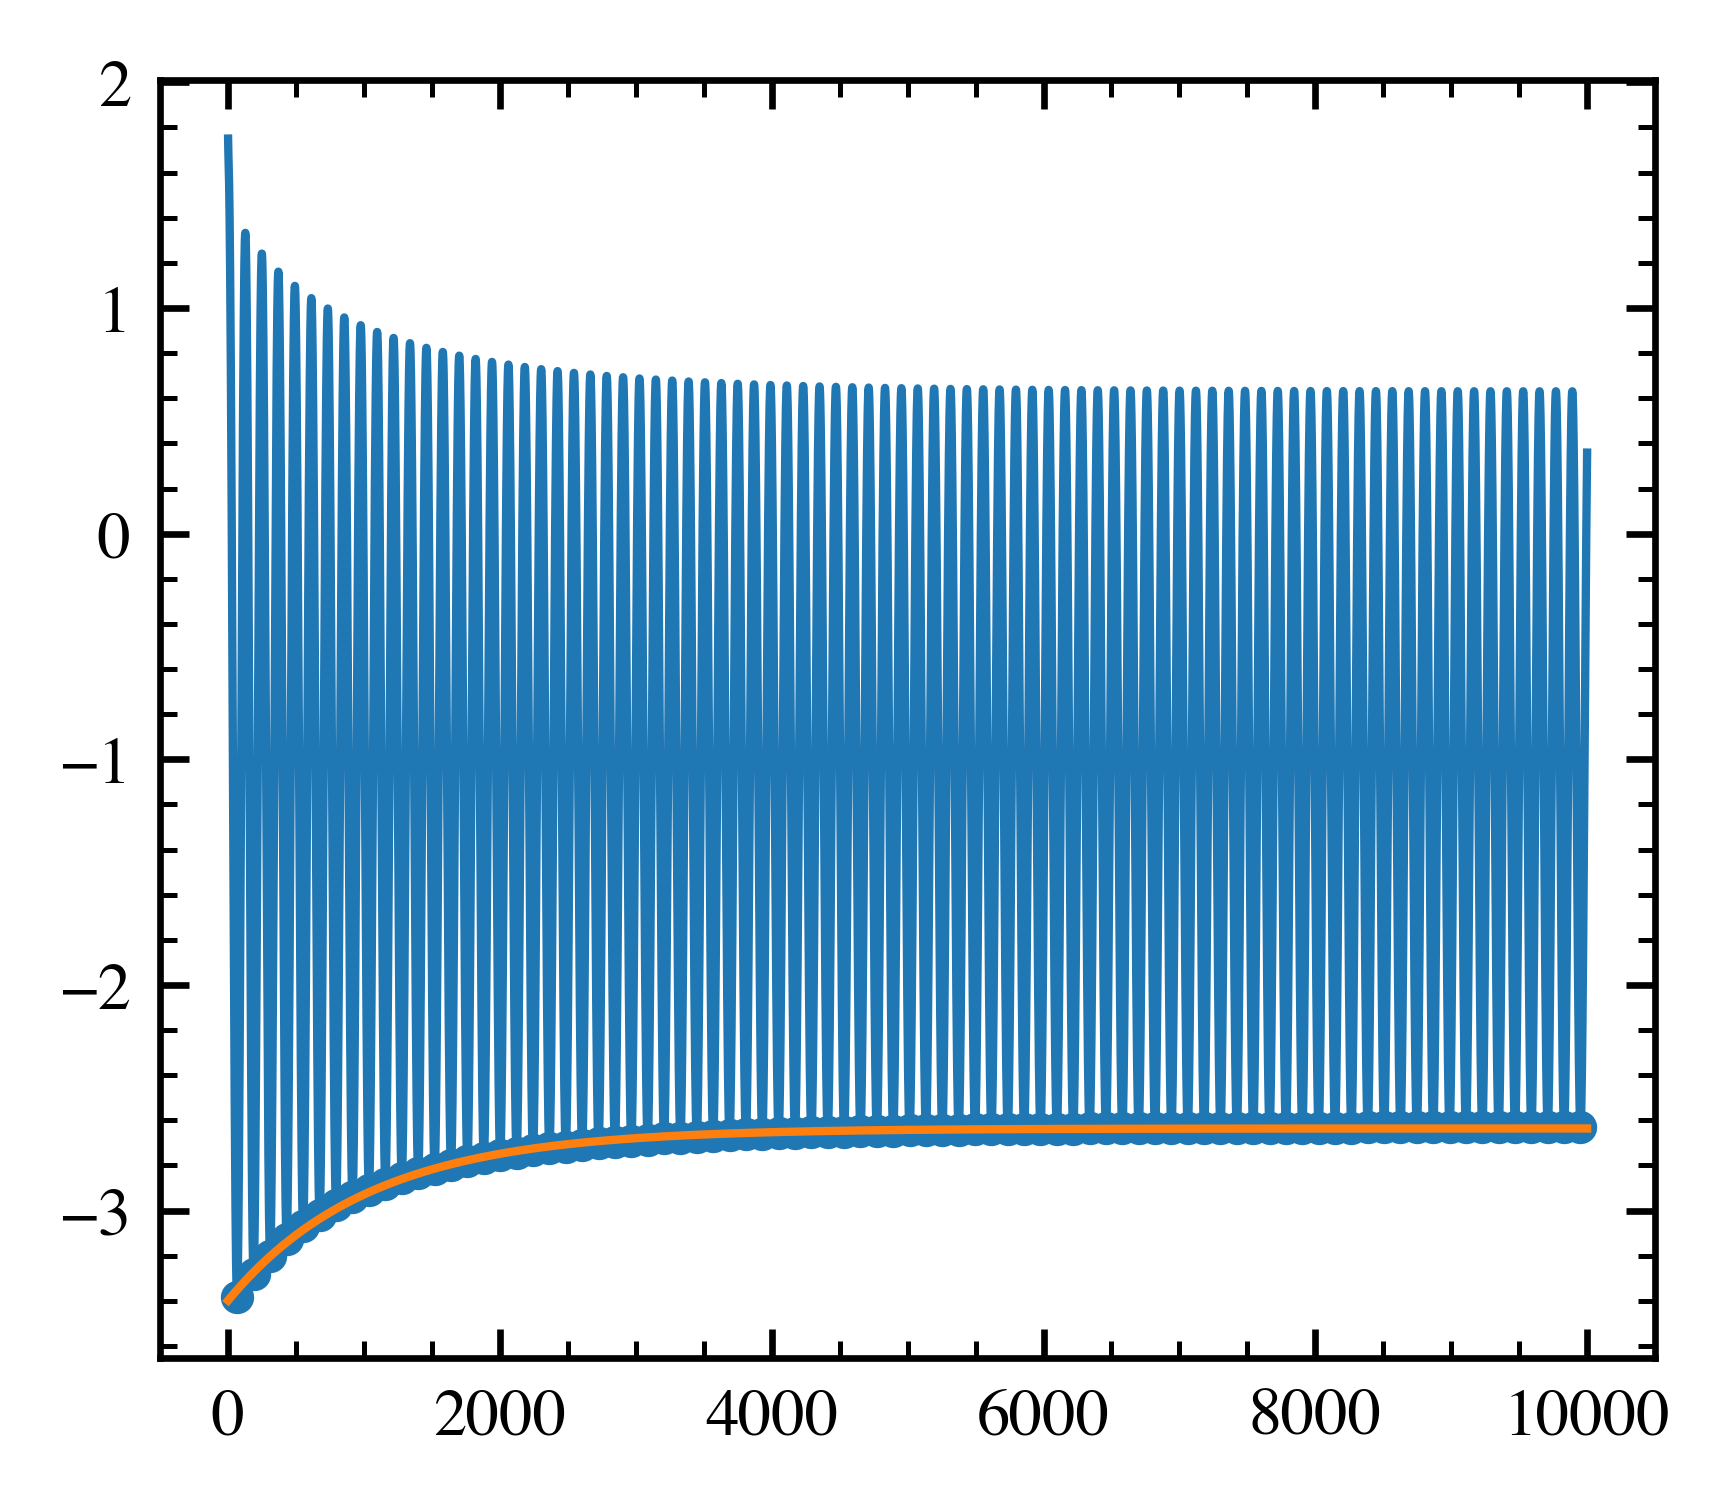

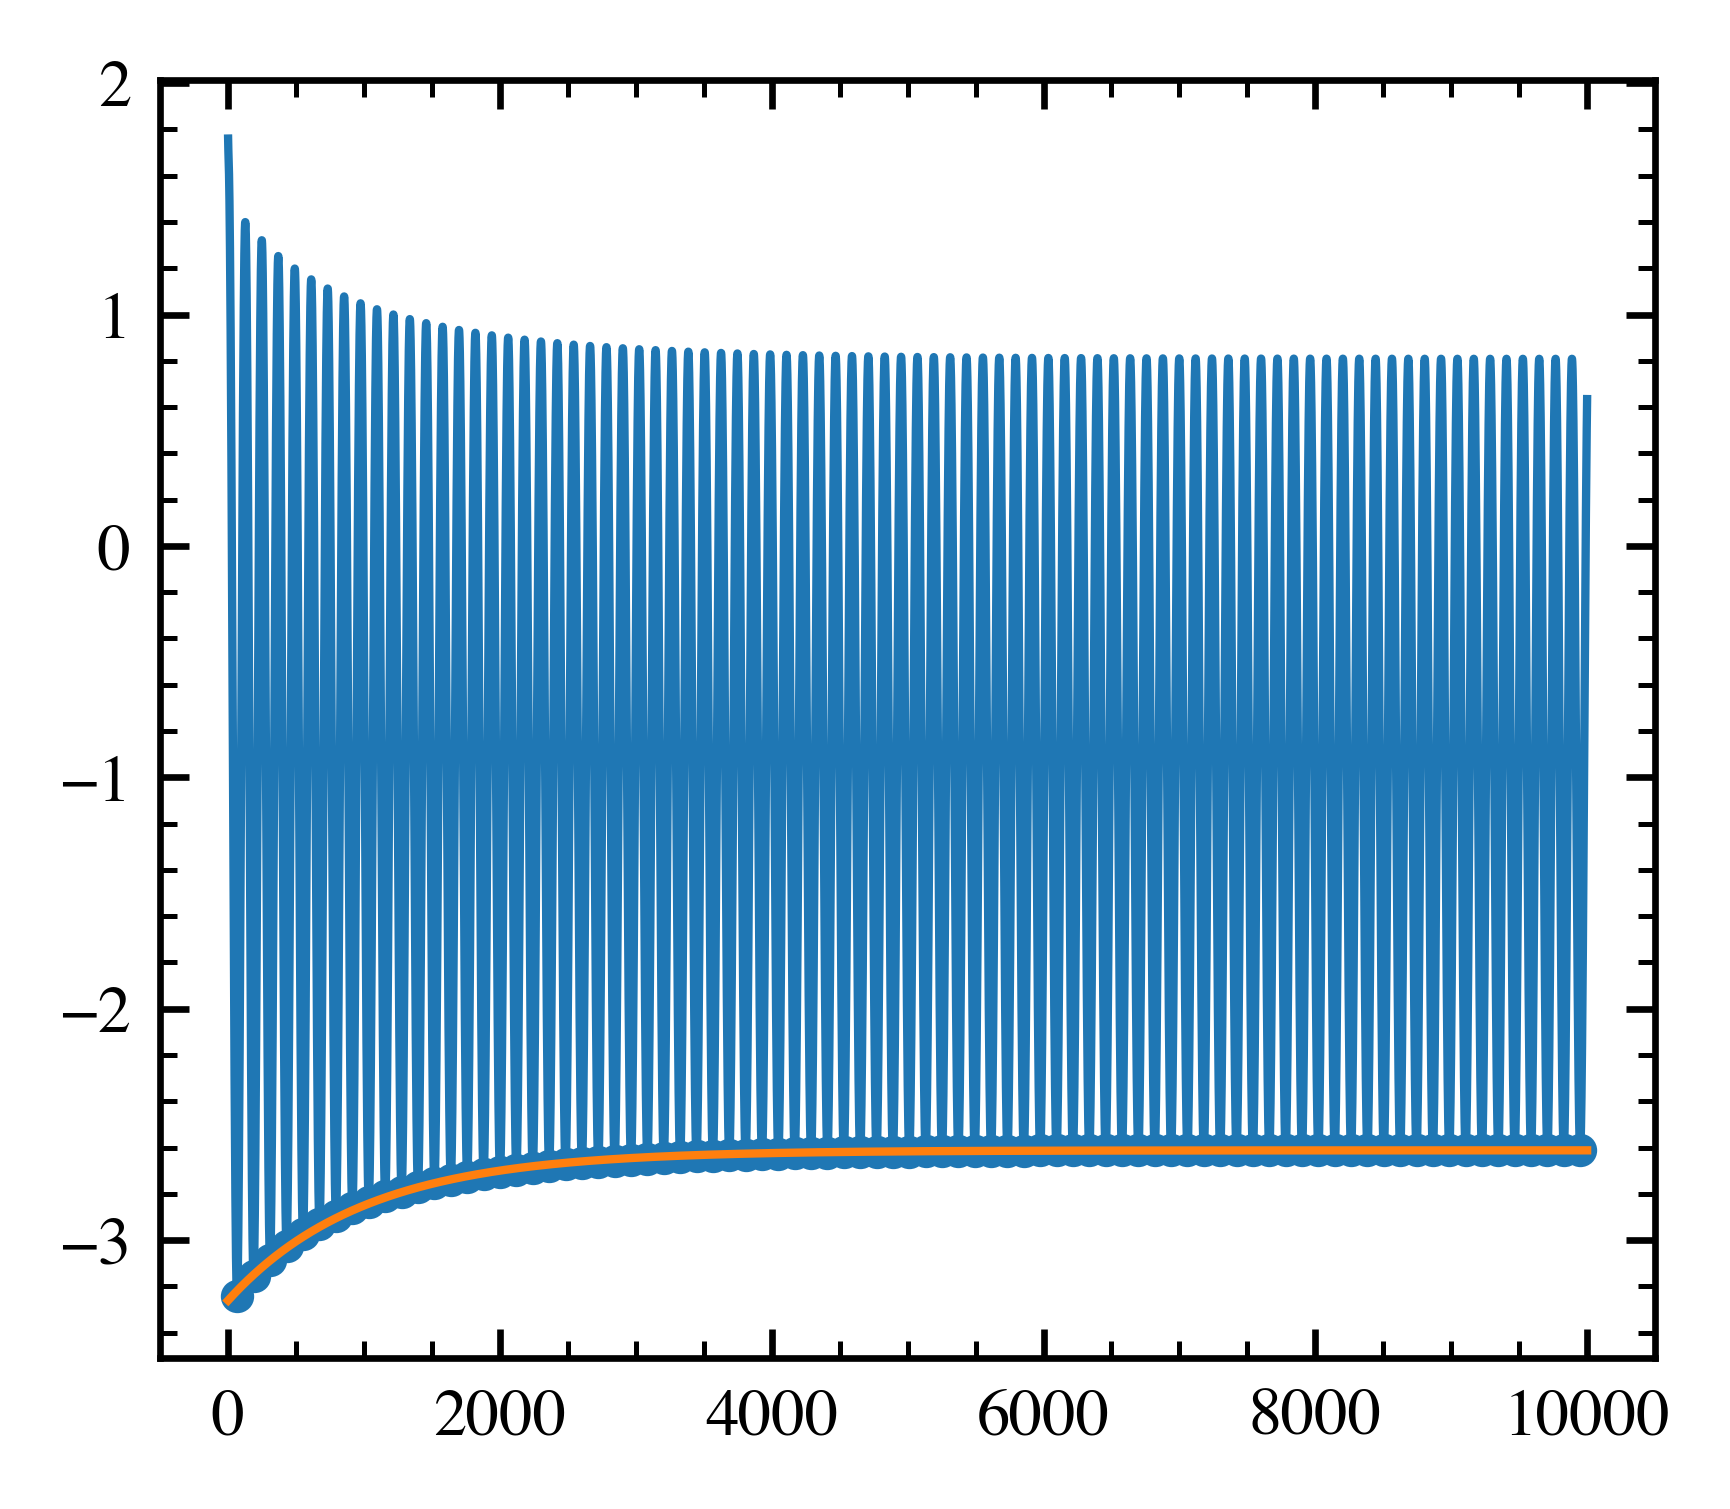

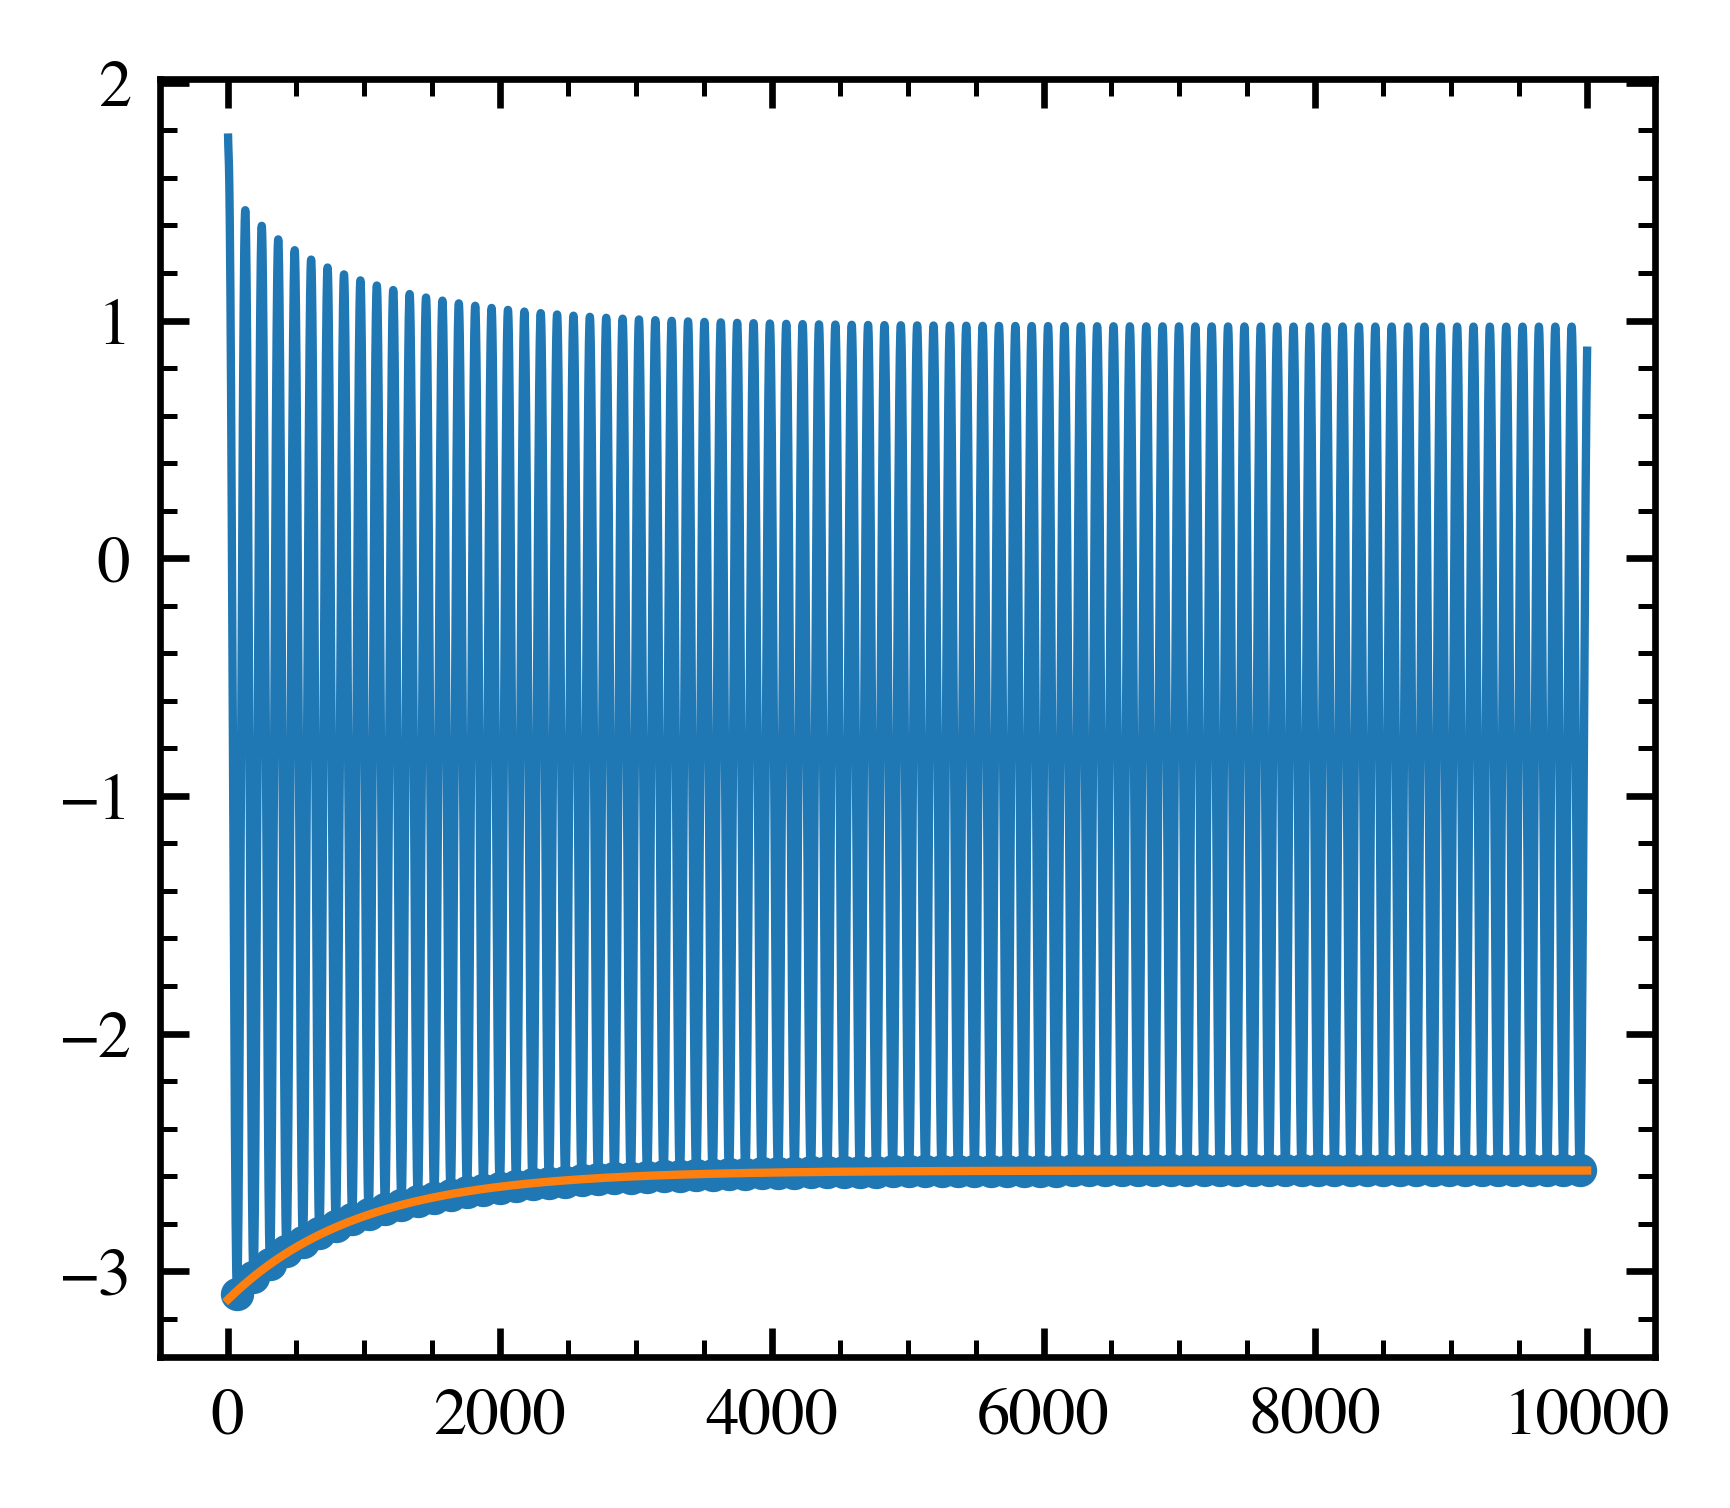

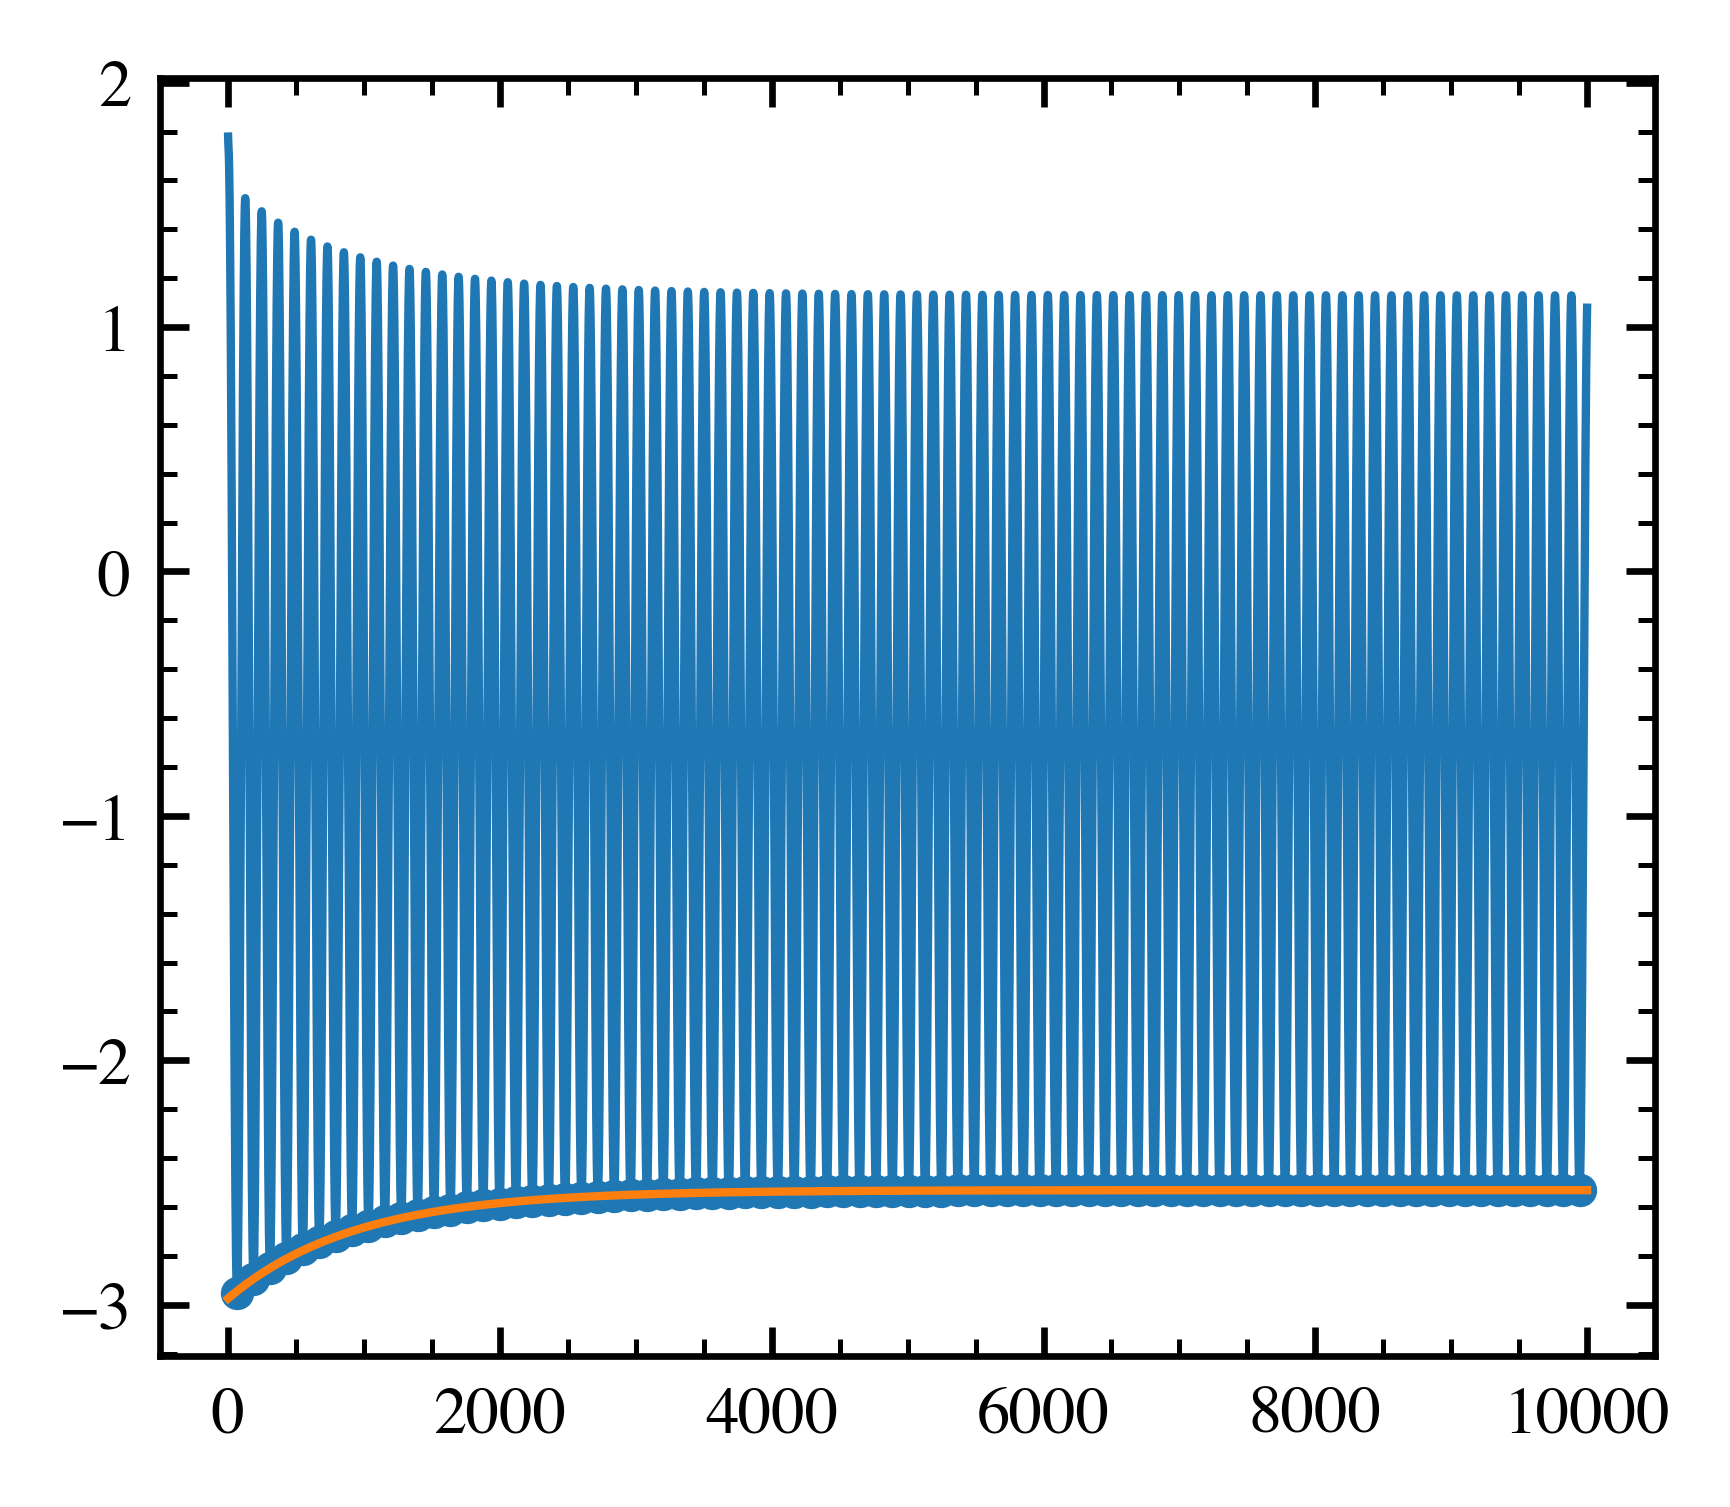

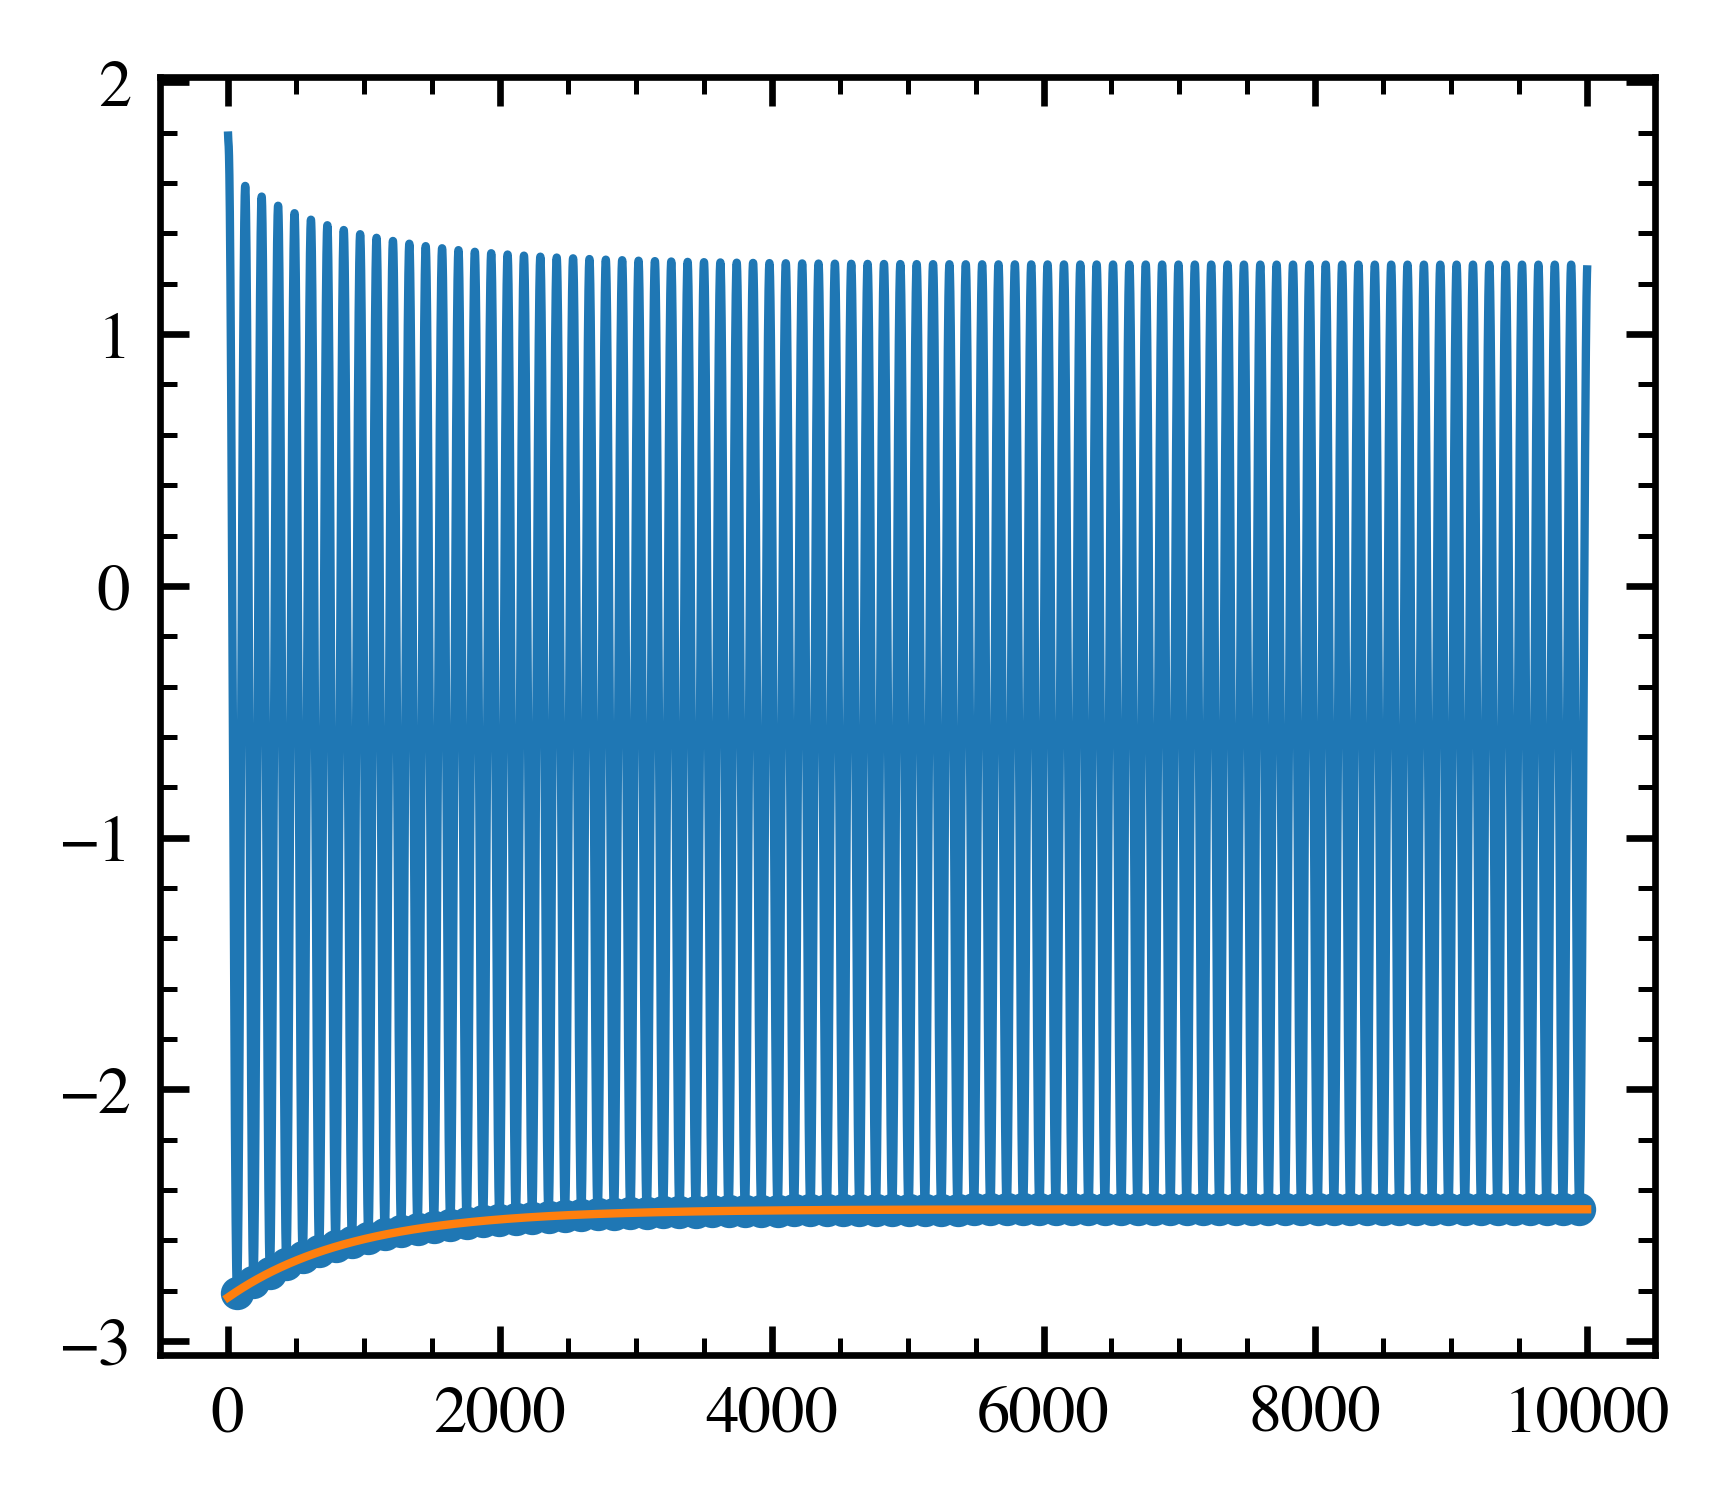

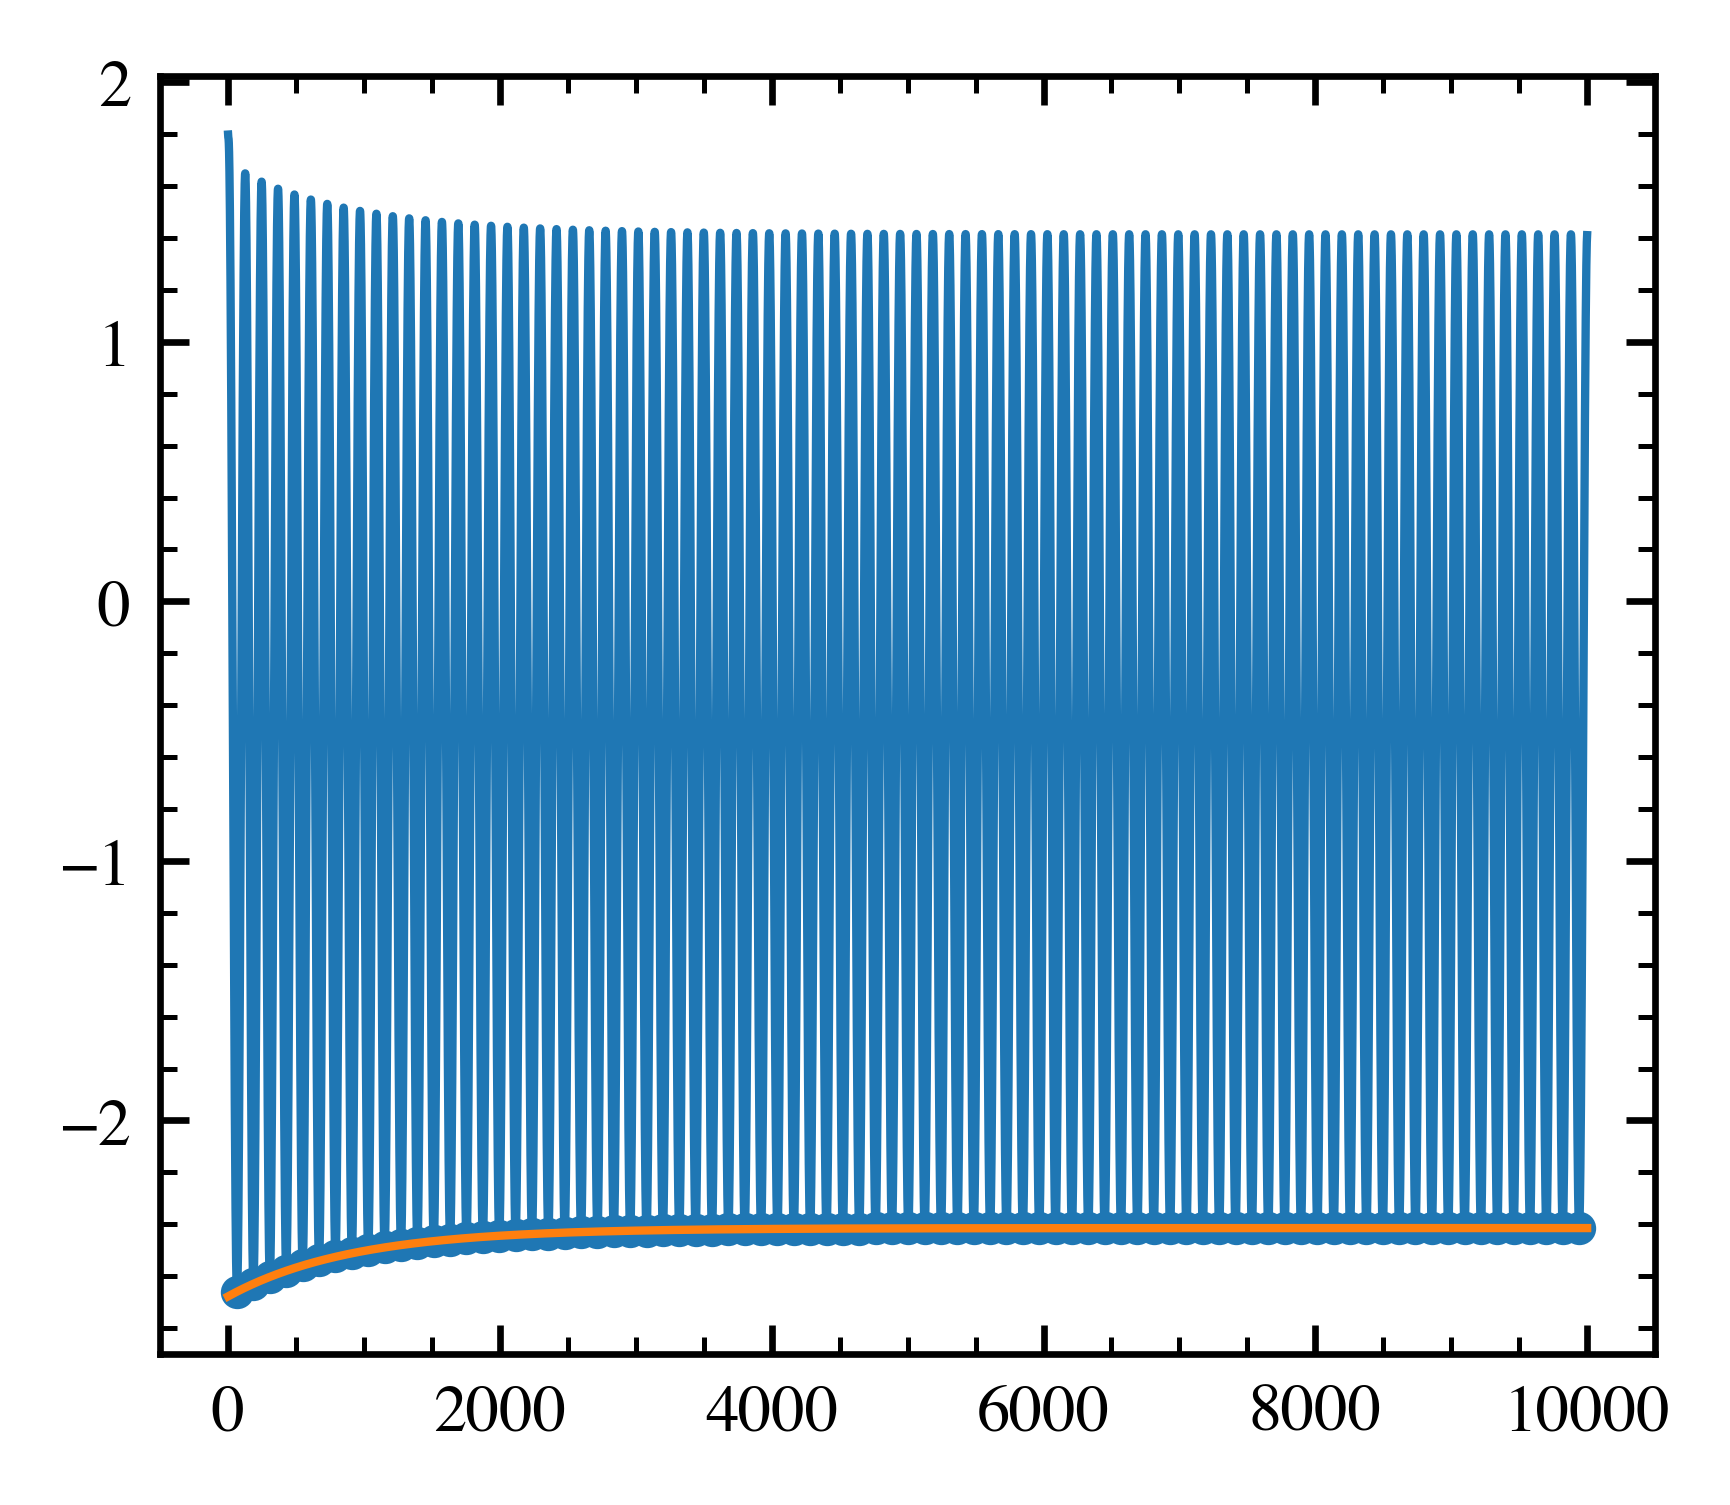

964.5656771746453 45.51997424287951


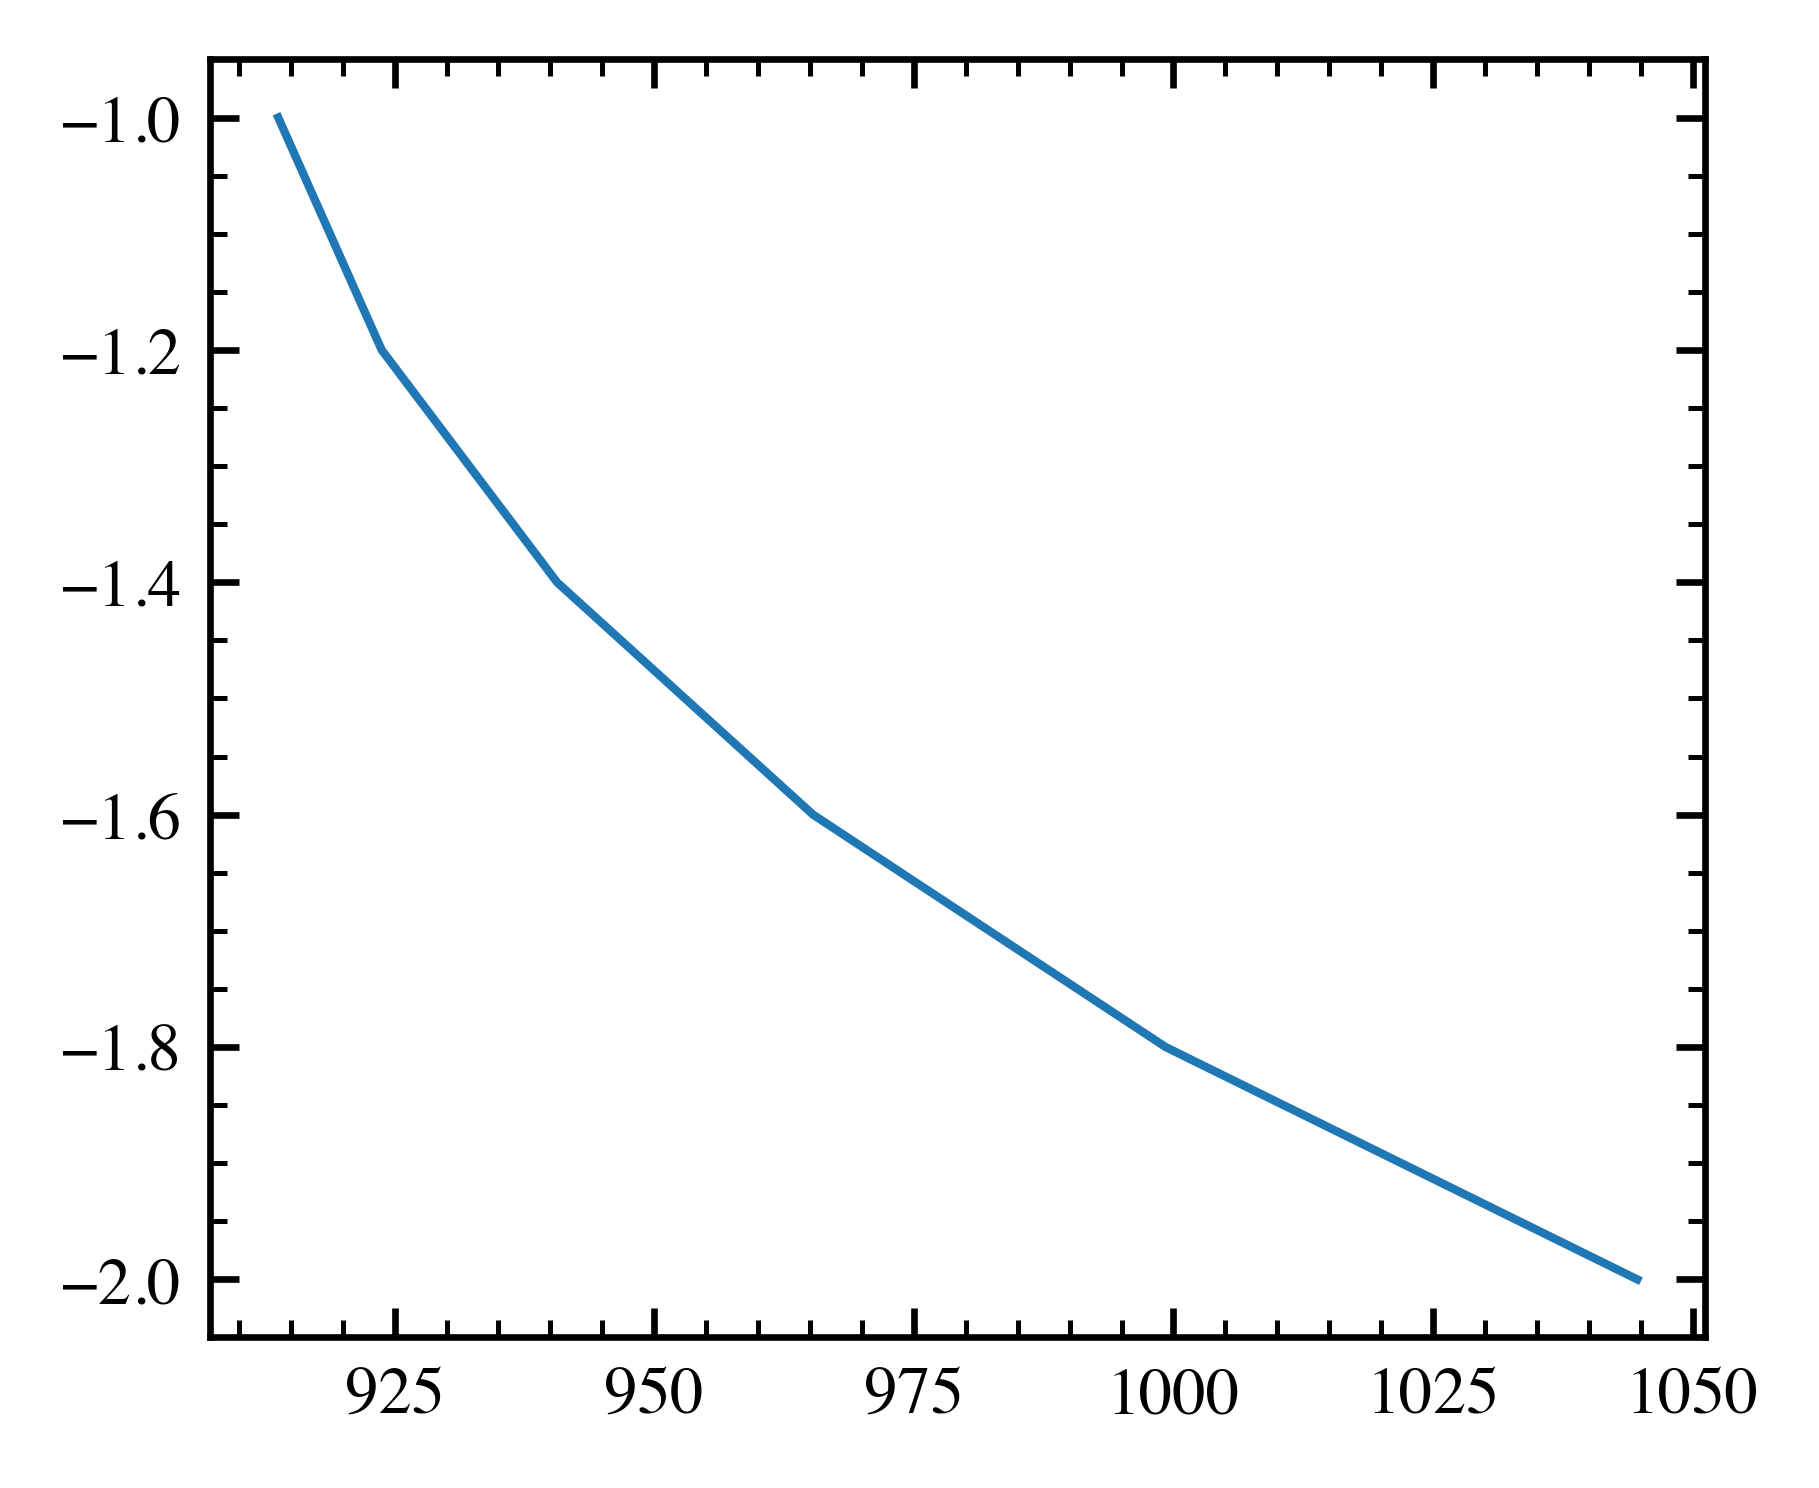

In [96]:
def fitfun(t, a, b, c):
    return a*np.exp(-t/b)+c
tp=100000
j=1
bs=np.zeros(len(Dr0s)-4)
for j in np.arange(len(Dr0s)-4):
    dispcom = np.average(Sols[:,:tp,:], axis=2)   #disp of com
    peaks, _ = find_peaks(-dispcom[j], height=0)
    #print(np.shape(peaks))
    plt.plot(times[:tp], dispcom[j].T)
    plt.scatter(times[peaks], dispcom[j][peaks])
    popt, pcov = curve_fit(fitfun, times[peaks], -dispcom[j][peaks], p0=[3.5,100, 2])
    bs[j]+=popt[1]
    plt.plot(times[:tp], -fitfun(times[:tp], *popt))
    plt.show()
print(np.mean(bs), np.std(bs))
plt.plot(bs, Dr0s[:6])